# Time Series Data

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

stock_data = yf.download('AAPL', start = '2024-01-01')
stock_data.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.081482,186.857978,182.346174,185.578799,82488700
2024-01-03,182.703171,184.319491,181.890048,182.673424,58414500
2024-01-04,180.382828,181.552914,179.361476,180.620803,71983600
2024-01-05,179.658936,181.225673,178.657420,180.462148,62379700
2024-01-08,184.002167,184.041839,179.976254,180.561297,59144500
2024-01-09,183.585693,183.595604,181.195922,182.375934,42841800
2024-01-10,184.626892,184.835121,182.375945,182.802343,46792900
2024-01-11,184.031906,185.479656,182.078444,184.973928,49128400


# Classical Time Series Decomposition

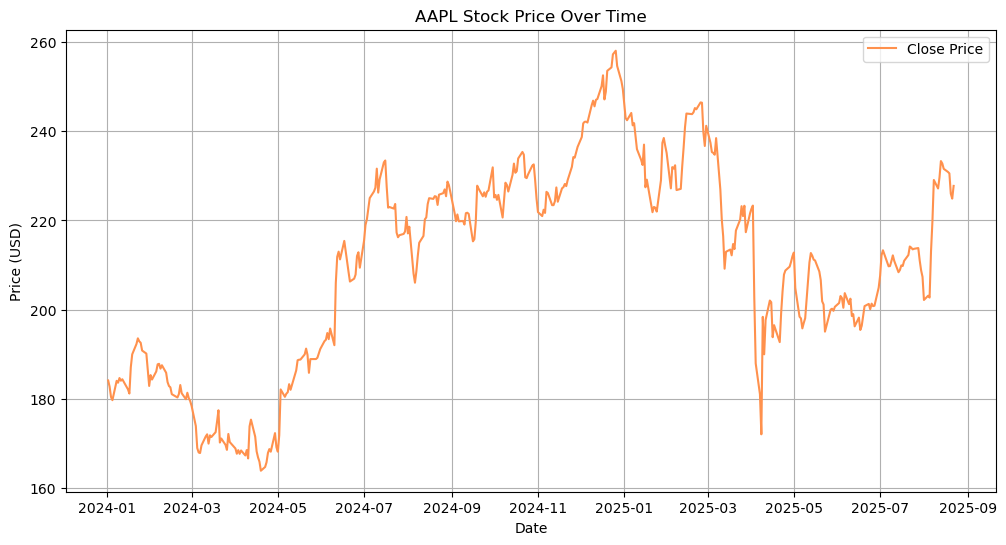

In [2]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data['Close'], label = 'Close Price', color = '#FF914D')
plt.title('AAPL Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Classical Time Series Decomposition

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_additive = seasonal_decompose(stock_data['Close'],  model = 'additive', period=30)

In [4]:
trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

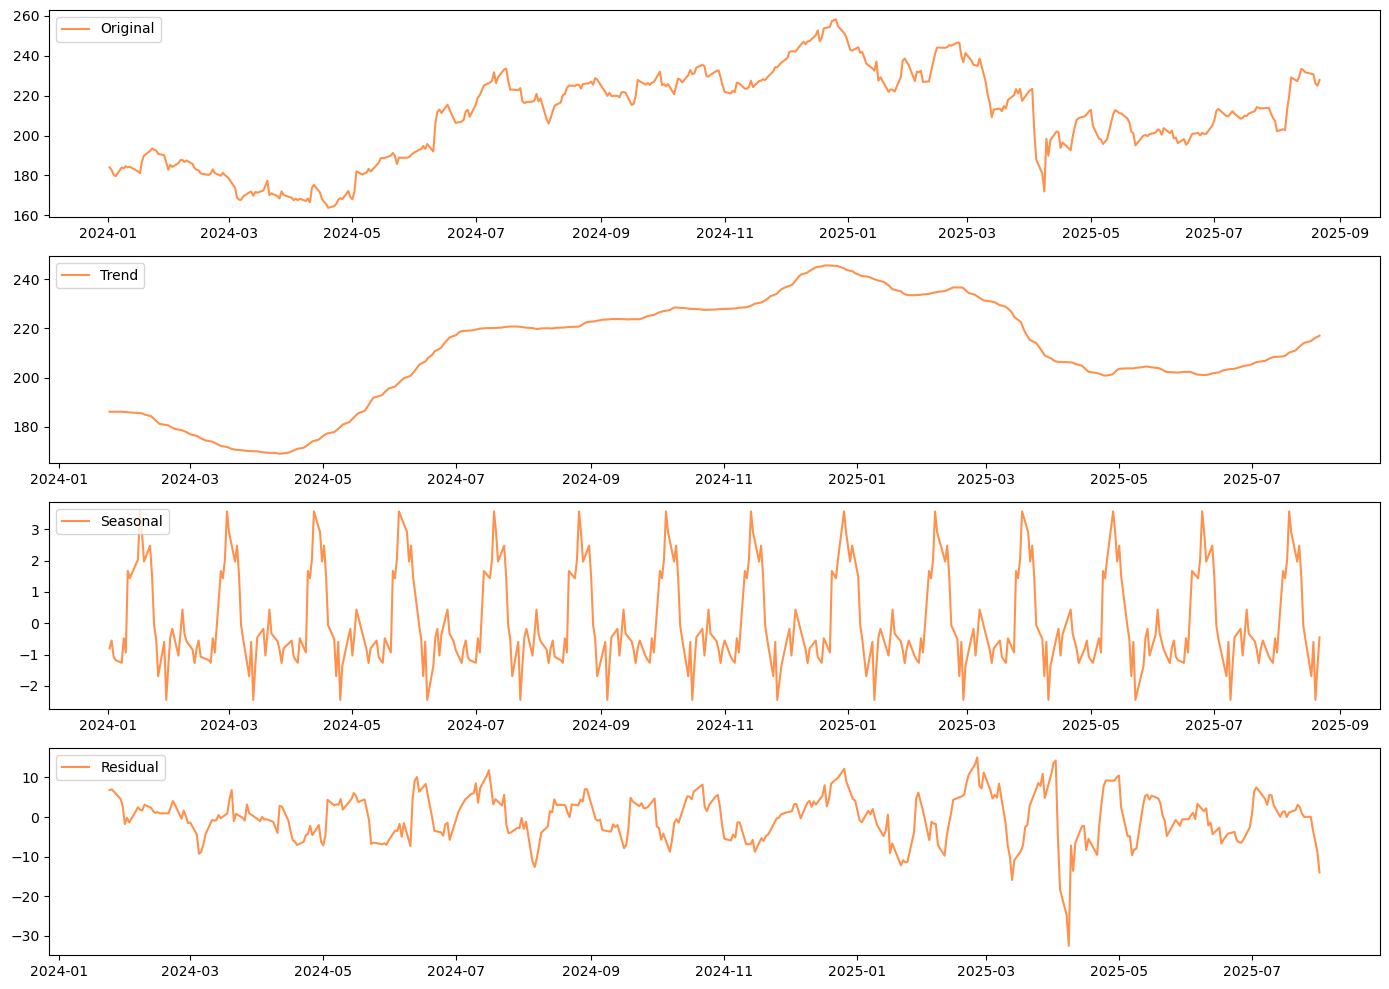

In [5]:
plt.figure(figsize = (14,10))
plt.subplot(411)
plt.plot(stock_data['Close'], label = 'Original', color = '#FF914D')
plt.legend(loc = 'upper left')

plt.subplot(412)
plt.plot(trend_additive, label = 'Trend', color = '#FF914D')
plt.legend(loc = 'upper left')

plt.subplot(413)
plt.plot(seasonal_additive, label = 'Seasonal', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.subplot(414)
plt.plot(residual_additive, label = 'Residual', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

# STL Decomposition

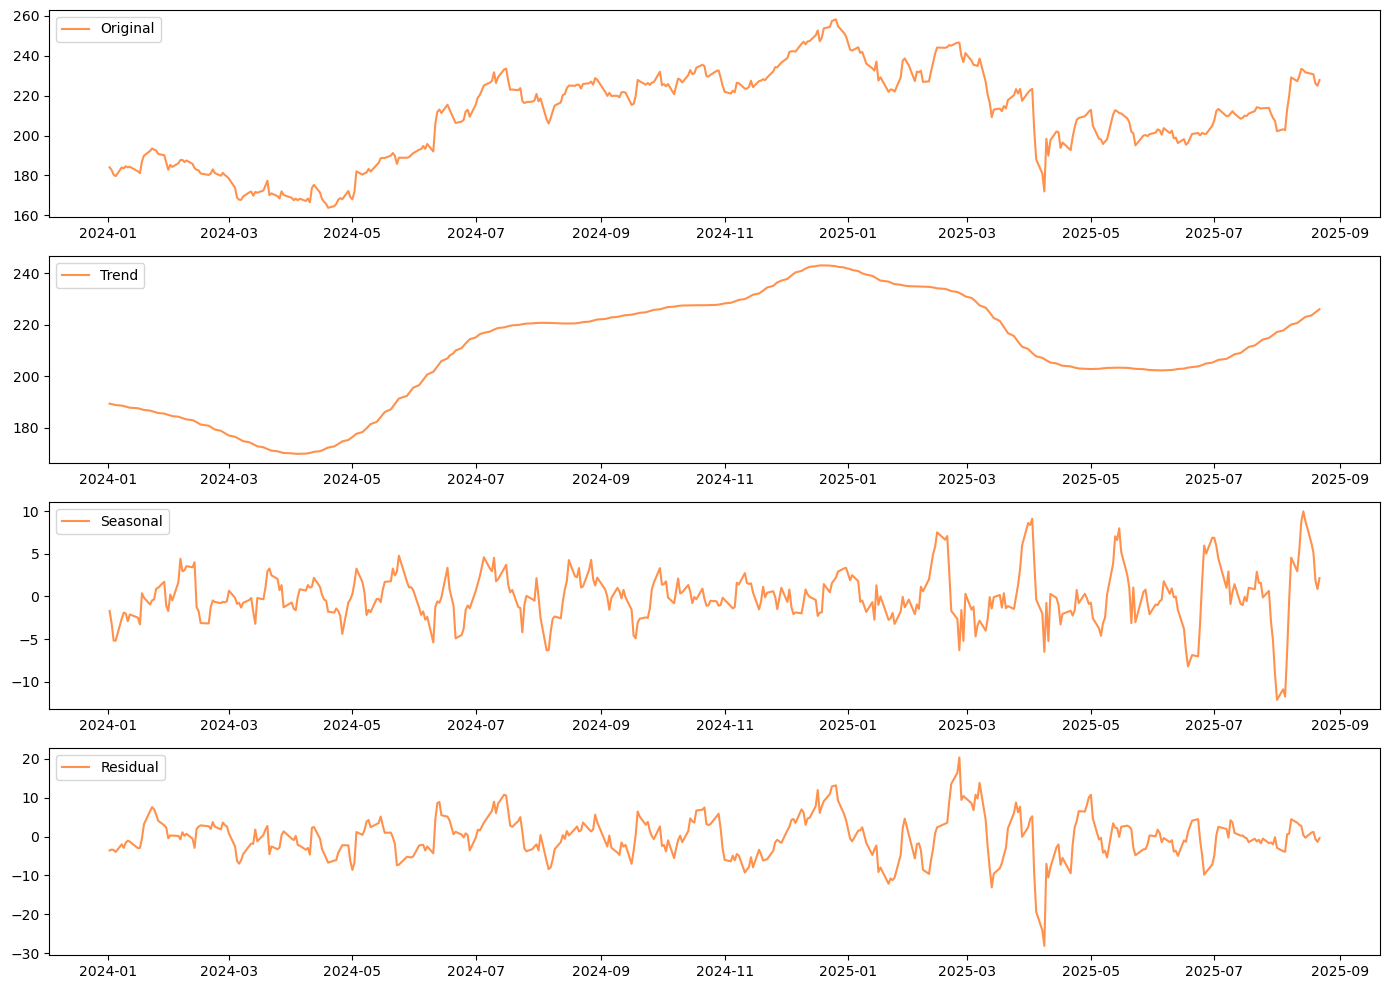

In [6]:
from statsmodels.tsa.seasonal import STL

# perform STL decomposition
stl = STL(stock_data['Close'], period=30)
result = stl.fit()

# plot the decomposition components
plt.figure(figsize = (14,10))
plt.subplot(411)
plt.plot(result.observed, label = 'Original', color = '#FF914D')
plt.legend(loc = 'upper left')

plt.subplot(412)
plt.plot(result.trend, label = 'Trend', color = '#FF914D')
plt.legend(loc = 'upper left')

plt.subplot(413)
plt.plot(result.seasonal, label = 'Seasonal', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.subplot(414)
plt.plot(result.resid, label = 'Residual', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

# Stationarity Test

## Weak stationarity
## Augmented Dickey Fuller (ADF) Test

In [7]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(stock_data['Close'])

print('ADF Test Results:')
print(f'ADF Statistic:{round(adf_test[0], 3)}')
print(f'p-value:{round(adf_test[1], 3)}')
print('Critical Values:')
for key, value in adf_test[4].items():
    print(f'  {key}:{round(value,3)}')
# p value >0.05, so this is non-stationary data

ADF Test Results:
ADF Statistic:-1.934
p-value:0.316
Critical Values:
  1%:-3.446
  5%:-2.869
  10%:-2.571


## Kwiatkowski-phillips-Schmidt-shin (KPSS) test

In [8]:
from statsmodels.tsa.stattools import kpss

# Perform the KPSS test
kpss_test = kpss(stock_data['Close'], regression = 'ct') # 'c' for constant (level stationaarity), 'ct' for trend

print('KPSS Test Results:')
print(f'KPSS Statistic: {round(kpss_test[0],2)}')
print(f'p-value: {kpss_test[1]}')
print('Critical Values:')
for key, value in kpss_test[3].items():
    print(f'   {key}:{value}')

# p < 5% 0.146 then this is nonstationary

KPSS Test Results:
KPSS Statistic: 0.59
p-value: 0.01
Critical Values:
   10%:0.119
   5%:0.146
   2.5%:0.176
   1%:0.216


C:\Users\Mason\AppData\Local\Temp\ipykernel_788\2155775247.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(stock_data['Close'], regression = 'ct') # 'c' for constant (level stationaarity), 'ct' for trend


## Strict stationarity
## K-S (Kolmogorov-Smirnov) test

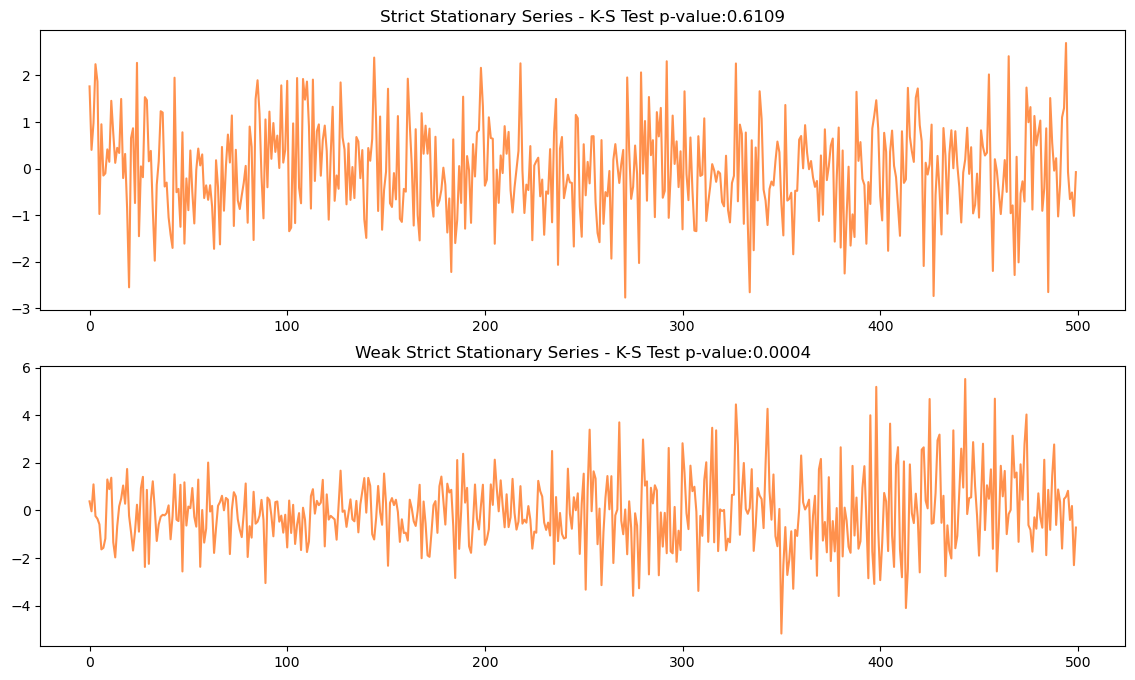

Strict Stationary Series - K-S Test Statistic: 0.068, p-value: 0.6109
Weak Stationary Series - K-S Test Statistic: 0.184, p-value: 0.0004


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Generating synthetic data for demonstration
np.random.seed(0)
n = 500

# Strictly stationary series: normally distributed random noise
strict_stationary_series = np.random.normal(0, 1, n)

# Non-strictly statinary series: changing variance
non_strict_stationary_series = np.concatenate([
    np.random.normal(0, 1, n // 2),
    np.random.normal(0, 2, n // 2)
    
])

# Function to split the series into two halves and perform the K-S test
def ks_test_stationarity(series):
    split = len(series) // 2
    series_first_half = series[:split]
    series_second_half = series[split:]
    stat, p_value = ks_2samp(series_first_half, series_second_half)
    return stat, p_value

# Perform the K-S test on tricktly stationary series
ks_stat_strict, ks_pvalue_strict = ks_test_stationarity(strict_stationary_series)


# Perform the K-S test on non-strictly stationary series
ks_stat_non_strict, ks_pvalue_non_strict = ks_test_stationarity(non_strict_stationary_series)


plt.figure(figsize = (14,8))
plt.subplot(211)
plt.plot(strict_stationary_series, color = '#FF914D')
plt.title(f'Strict Stationary Series - K-S Test p-value:{round(ks_pvalue_strict, 4)}')

plt.subplot(212)
plt.plot(non_strict_stationary_series, color = '#FF914D')
plt.title(f'Weak Strict Stationary Series - K-S Test p-value:{round(ks_pvalue_non_strict, 4)}')
plt.show()
print(f'Strict Stationary Series - K-S Test Statistic: {ks_stat_strict}, p-value: {round(ks_pvalue_strict, 4)}')
print(f'Weak Stationary Series - K-S Test Statistic: {ks_stat_non_strict}, p-value: {round(ks_pvalue_non_strict, 4)}')

# Making Data Stationary

In [10]:
# Performing ADF and KPSS tests
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Value (%s): %.3f' % (key, value))
        
def kpss_test(series):
    result = kpss(series, regression = 'c')
    print('KPSS Statistic', result[0])
    print('p-value:', result[1])
    for key, value in result[3].items():
        print('Critical Value (%s): %.3f' % (key, value))

In [11]:
prices = stock_data['Close']
adf_test(prices)
# p > 0.05 not stationary

ADF Statistic: -1.9341044680849027
p-value: 0.3161912309750683
Critical Value (1%): -3.446
Critical Value (5%): -2.869
Critical Value (10%): -2.571


In [12]:
prices.head()

Ticker,AAPL
Date,
2024-01-02,184.081482
2024-01-03,182.703171
2024-01-04,180.382828
2024-01-05,179.658936
2024-01-08,184.002167


In [13]:
# first order difference
prices.diff().head()

Ticker,AAPL
Date,
2024-01-02,NaN
2024-01-03,-1.378311
2024-01-04,-2.320343
2024-01-05,-0.723892
2024-01-08,4.343231


In [14]:
# second order difference
prices.diff().diff().head()

Ticker,AAPL
Date,
2024-01-02,NaN
2024-01-03,NaN
2024-01-04,-0.942032
2024-01-05,1.596451
2024-01-08,5.067123


In [15]:
import numpy as np
from scipy import stats

#log transformation
price_log = np.log(prices)

#square root transformation
price_sqrt = np.sqrt(prices)

# Box-Cox transformation
# Note: Box-Cox requires all positive values
# prices_boxcox, lam = stats.boxcox(prices[prices > 0])
prices_boxcox, lam = stats.boxcox(np.array(prices[prices > 0]).ravel())

In [16]:
price_log.head()

Ticker,AAPL
Date,
2024-01-02,5.215378
2024-01-03,5.207863
2024-01-04,5.195081
2024-01-05,5.191060
2024-01-08,5.214948


In [17]:
price_sqrt.head()

Ticker,AAPL
Date,
2024-01-02,13.567663
2024-01-03,13.516774
2024-01-04,13.430667
2024-01-05,13.403691
2024-01-08,13.564740


In [18]:
adf_test(prices_boxcox)
# p value is high, so we are not getting stationary data.

ADF Statistic: -1.962713766355066
p-value: 0.3031572007117135
Critical Value (1%): -3.446
Critical Value (5%): -2.869
Critical Value (10%): -2.571


In [19]:
adf_test(prices.diff().dropna())
# 9.5571177336925e-22 < 0.05

ADF Statistic: -11.796391190745071
p-value: 9.556779487645838e-22
Critical Value (1%): -3.446
Critical Value (5%): -2.869
Critical Value (10%): -2.571


In [20]:
from scipy import signal

# using a linear trend
trend = np.polyfit(np.arange(len(prices)), prices, 1)
trendline = np.polyval(trend, np.arange(len(prices)))
# prices_detrended = prices - trendline
prices_detrended = np.array(prices).ravel() - trendline

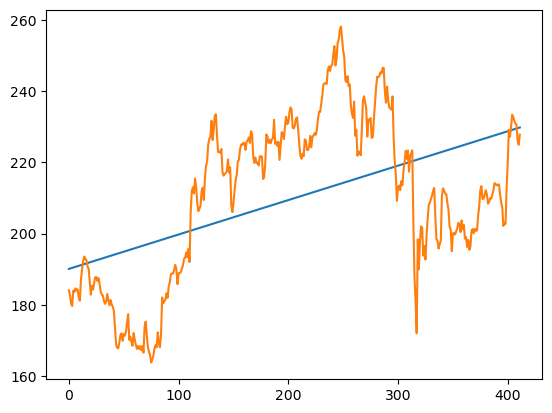

In [21]:
plt.plot(np.arange(len(prices)), trendline)
plt.plot(np.arange(len(prices)), prices)

In [22]:
adf_test(prices_detrended)
# p value < 0.05

ADF Statistic: -2.087363437481959
p-value: 0.24962609145512316
Critical Value (1%): -3.446
Critical Value (5%): -2.869
Critical Value (10%): -2.571


In [23]:
# Using a linear trend
window = 12 # example window size
prices_ma = prices.rolling(window = window).mean()
prices_detrended = prices - prices_ma
prices_detrended = prices_detrended.dropna()

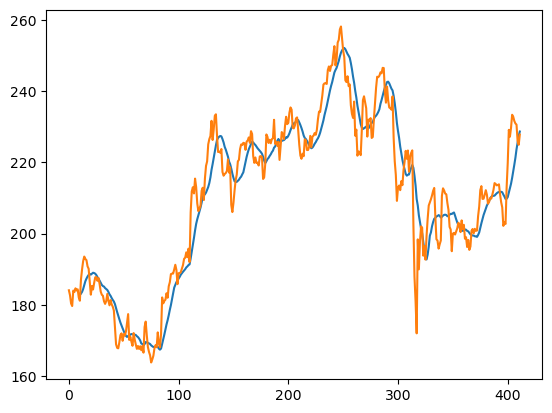

In [24]:
plt.plot(np.arange(len(prices)), prices_ma)
plt.plot(np.arange(len(prices)), prices)
plt.show()

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decompostion using moving averages
decomposition = seasonal_decompose(prices, model = 'additive', period=30)
# prices_adjusted = prices / decomposition.seasonal
prices_adjusted = np.array(prices).ravel() / decomposition.seasonal
prices_adjusted = prices_adjusted.dropna()

In [26]:
adf_test(prices_adjusted)
# p value < 0.05 stationary

ADF Statistic: -7.429582741999377
p-value: 6.413204398499854e-11
Critical Value (1%): -3.447
Critical Value (5%): -2.869
Critical Value (10%): -2.571
